In [13]:
### load the functions
load('Gssp_sequence.sage')

### Example 3.4

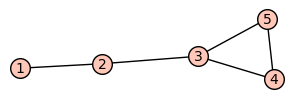

In [7]:
V = [1,2,3,4,5]
E = [(1,2), (2,3), (3,4), (4,5), (5,3)]
g = Graph([V,E])
g.show(figsize=[3,3])

In [18]:
forces = Gssp_sequence(g, print_force=True)

Rule 1: {2,1} --> {1,3}
Rule 1: {3,4} --> {4,2}
Rule 1: {3,2} --> {2,5}
Rule 1: {2,4} --> {4,1}
Rule 1: {3,1} --> {1,5}


### Example 3.16

### Example 3.17

### Example 4.2

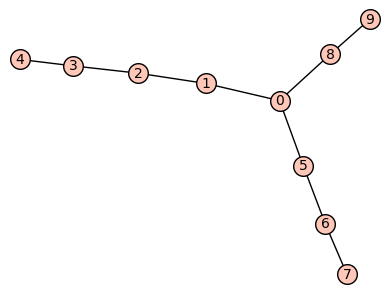

In [10]:
g = Y_graph(4,3,2)
g.show(figsize=[4,4])

In [16]:
forces = Gssp_sequence(g, print_force=True)

Rule 1: {3,4} --> {4,2}
Rule 1: {2,3} --> {3,1}
Rule 1: {1,2} --> {2,0}
Rule 1: {2,4} --> {4,1}
Rule 1: {1,3} --> {3,0}
Rule 1: {1,4} --> {4,0}
Rule 1: {6,7} --> {7,5}
Rule 1: {5,6} --> {6,0}
Rule 1: {5,7} --> {7,0}
Rule 1: {8,9} --> {9,0}
Rule 2: 0 --> [1, 5, 8]
Rule 3: Y_h^(h) --> Y_h^(h+1)
        Y centered at 0 with h = 2
        branch1 [1, 2]
        branch2 [5, 6]
        branch3 [8, 9]
Rule 1: {1,9} --> {9,2}
Rule 1: {2,8} --> {8,3}
Rule 1: {0,3} --> {3,5}
Rule 1: {5,2} --> {2,6}
Rule 1: {6,1} --> {1,7}
Rule 1: {0,7} --> {7,8}
Rule 1: {1,7} --> {7,2}
Rule 1: {2,6} --> {6,3}
Rule 1: {2,7} --> {7,3}
Rule 1: {2,9} --> {9,3}
Rule 1: {3,5} --> {5,4}
Rule 1: {0,4} --> {4,8}
Rule 1: {3,6} --> {6,4}
Rule 1: {3,7} --> {7,4}
Rule 1: {3,9} --> {9,4}
Rule 1: {5,9} --> {9,6}
Rule 1: {6,9} --> {9,7}


### Example 5.4

In [ ]:
A = ... X = ...